<a href="https://colab.research.google.com/github/Vineethjere/sales-forecasting-dashboard/blob/main/Multi-Source%20Demand%20Forecasting%20Engine%20Using%20an%20LSTM%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import io

# Step 2: Create our sample data as a string
# In a real project, this would be a file (e.g., Excel, CSV) you upload.
# For learning, creating it here is easier.
ice_cream_sales_data = """
Date,Sales
2024-01-01,110
2024-01-08,115
2024-01-15,120
2024-01-22,118
2024-01-29,125
2024-02-05,130
2024-02-12,135
2024-02-19,140
2024-02-26,142
2024-03-04,155
2024-03-11,160
2024-03-18,165
2024-03-25,170
2024-04-01,185
2024-04-08,190
2024-04-15,200
2024-04-22,210
2024-04-29,220
2024-05-06,250
2024-05-13,260
2024-05-20,275
2024-05-27,290
2024-06-03,320
2024-06-10,340
2024-06-17,350
2024-06-24,360
2024-07-01,400
2024-07-08,410
2024-07-15,425
2024-07-22,415
2024-07-29,405
2024-08-05,390
2024-08-12,380
2024-08-19,370
2024-08-26,350
2024-09-02,320
2024-09-09,300
2024-09-16,280
2024-09-23,260
2024-09-30,240
2024-10-07,210
2024-10-14,200
2024-10-21,190
2024-10-28,180
2024-11-04,160
2024-11-11,155
2024-11-18,150
2024-11-25,145
2024-12-02,135
2024-12-09,130
2024-12-16,140
2024-12-23,160
2024-12-30,150
"""

# Step 3: Load the data into a Pandas DataFrame
# A DataFrame is like a smart spreadsheet or table in Python.
df_sales = pd.read_csv(io.StringIO(ice_cream_sales_data), parse_dates=['Date'])

# Step 4: Explore the data
print("--- First 5 rows of our data ---")
print(df_sales.head())
print("\n--- Information about our data columns ---")
print(df_sales.info())
print("\n--- Basic statistics of our sales data ---")
print(df_sales.describe())

--- First 5 rows of our data ---
        Date  Sales
0 2024-01-01    110
1 2024-01-08    115
2 2024-01-15    120
3 2024-01-22    118
4 2024-01-29    125

--- Information about our data columns ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    53 non-null     datetime64[ns]
 1   Sales   53 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 980.0 bytes
None

--- Basic statistics of our sales data ---
                      Date       Sales
count                   53   53.000000
mean   2024-07-01 00:00:00  231.792453
min    2024-01-01 00:00:00  110.000000
25%    2024-04-01 00:00:00  150.000000
50%    2024-07-01 00:00:00  200.000000
75%    2024-09-30 00:00:00  320.000000
max    2024-12-30 00:00:00  425.000000
std                    NaN   99.086473


--- Generating Plot of Weekly Ice Cream Sales ---


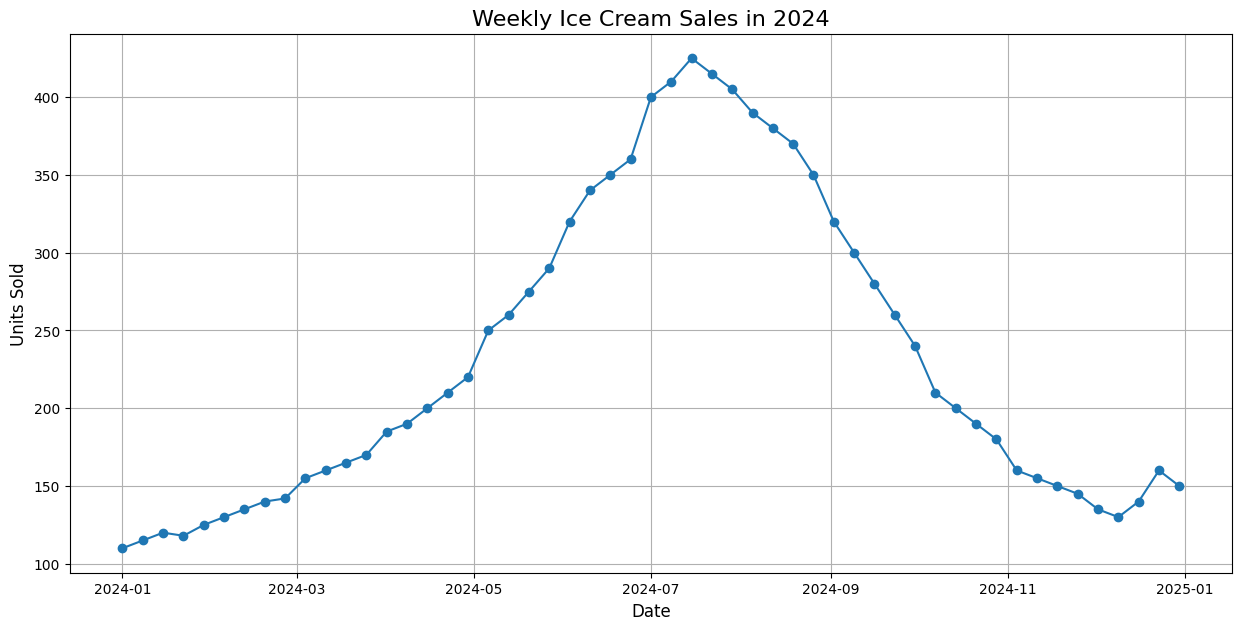

In [3]:
# Step 1: Import the plotting library
import matplotlib.pyplot as plt

# It's good practice to make a copy of our original dataframe before we modify it.
df_plot = df_sales.copy()

# Step 2: Set the 'Date' column as the index of our DataFrame.
# This is a common practice for time-series data as it makes plotting easier
# and is helpful for many time-series functions.
df_plot.set_index('Date', inplace=True)

# Step 3: Create the plot
print("--- Generating Plot of Weekly Ice Cream Sales ---")

# Create a figure and a set of subplots. This is like getting our canvas ready.
# figsize=(15, 7) makes the plot wide (15) and tall (7), so it's easy to read.
plt.figure(figsize=(15, 7))

# Plot the data. We use the DataFrame's index (our dates) for the x-axis
# and the 'Sales' column for the y-axis.
plt.plot(df_plot.index, df_plot['Sales'], marker='o', linestyle='-')

# Step 4: Add labels and a title to make the chart understandable
plt.title('Weekly Ice Cream Sales in 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.grid(True) # Add a grid for easier reading of values

# Step 5: Show the plot
plt.show()

In [4]:
# We still need pandas and io
import pandas as pd
import io

# Step 1: Create our sample weather data as a string
# Notice the temperatures align with the seasons: low in Jan, high in July.
# The dates match our sales data exactly.
weather_data = """
Date,Avg_Temperature_C
2024-01-01,2
2024-01-08,3
2024-01-15,0
2024-01-22,4
2024-01-29,5
2024-02-05,6
2024-02-12,5
2024-02-19,7
2024-02-26,8
2024-03-04,10
2024-03-11,12
2024-03-18,11
2024-03-25,13
2024-04-01,15
2024-04-08,14
2024-04-15,16
2024-04-22,17
2024-04-29,18
2024-05-06,20
2024-05-13,19
2024-05-20,22
2024-05-27,24
2024-06-03,25
2024-06-10,26
2024-06-17,28
2024-06-24,27
2024-07-01,30
2024-07-08,31
2024-07-15,32
2024-07-22,30
2024-07-29,29
2024-08-05,28
2024-08-12,27
2024-08-19,26
2024-08-26,25
2024-09-02,22
2024-09-09,21
2024-09-16,20
2024-09-23,18
2024-09-30,17
2024-10-07,15
2024-10-14,13
2024-10-21,12
2024-10-28,11
2024-11-04,9
2024-11-11,8
2024-11-18,7
2024-11-25,6
2024-12-02,5
2024-12-09,4
2024-12-16,3
2024-12-23,5
2024-12-30,4
"""

# Step 2: Load the weather data into its own DataFrame
df_weather = pd.read_csv(io.StringIO(weather_data), parse_dates=['Date'])

print("--- Weather DataFrame Head ---")
print(df_weather.head())

# Step 3: Merge the two DataFrames into one
# This is the key step! We combine the two tables based on their common 'Date' column.
df_full = pd.merge(df_sales, df_weather, on='Date', how='inner')

# Step 4: Display the new, combined DataFrame
print("\n--- Merged DataFrame (Sales + Weather) Head ---")
print(df_full.head()) # Show the first 5 rows

print("\n--- Merged DataFrame (Sales + Weather) Tail ---")
print(df_full.tail()) # Show the last 5 rows

--- Weather DataFrame Head ---
        Date  Avg_Temperature_C
0 2024-01-01                  2
1 2024-01-08                  3
2 2024-01-15                  0
3 2024-01-22                  4
4 2024-01-29                  5

--- Merged DataFrame (Sales + Weather) Head ---
        Date  Sales  Avg_Temperature_C
0 2024-01-01    110                  2
1 2024-01-08    115                  3
2 2024-01-15    120                  0
3 2024-01-22    118                  4
4 2024-01-29    125                  5

--- Merged DataFrame (Sales + Weather) Tail ---
         Date  Sales  Avg_Temperature_C
48 2024-12-02    135                  5
49 2024-12-09    130                  4
50 2024-12-16    140                  3
51 2024-12-23    160                  5
52 2024-12-30    150                  4


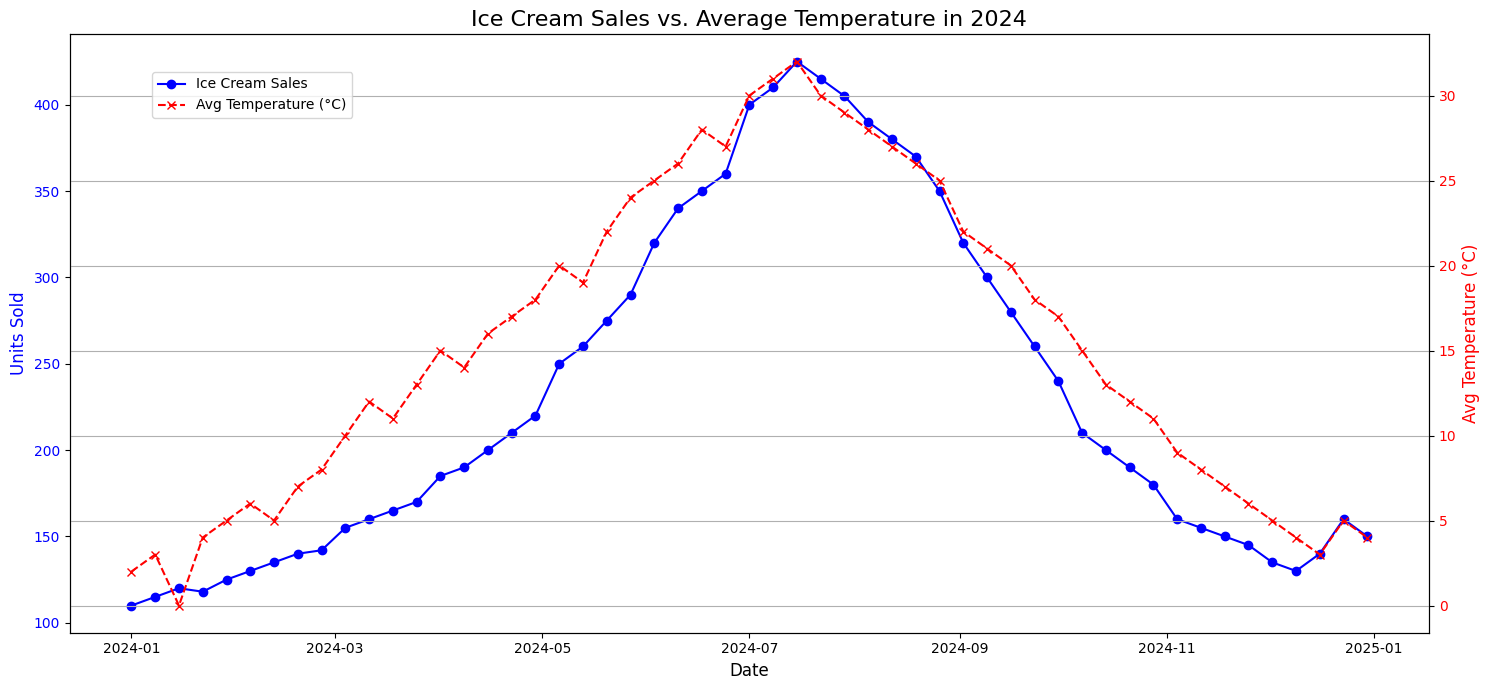

In [5]:
# Import the plotting library again
import matplotlib.pyplot as plt

# Make a copy of our full dataframe for plotting
df_multi_plot = df_full.copy()

# Set the 'Date' column as the index for easier plotting
df_multi_plot.set_index('Date', inplace=True)

# --- This is the new, more advanced plotting code ---

# Step 1: Create the figure and the primary Y-axis (ax1)
# fig is the whole canvas, ax1 is our first set of axes
fig, ax1 = plt.subplots(figsize=(15, 7))

# Step 2: Plot the Ice Cream Sales on the primary axis (ax1)
ax1.plot(df_multi_plot.index, df_multi_plot['Sales'], color='blue', marker='o', label='Ice Cream Sales')
ax1.set_xlabel('Date', fontsize=12)
# Make the Y-axis label and ticks blue to match the sales line
ax1.set_ylabel('Units Sold', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Step 3: Create the secondary Y-axis (ax2) that shares the same X-axis
ax2 = ax1.twinx()  # THIS IS THE KEY COMMAND!

# Step 4: Plot the Temperature on the secondary axis (ax2)
ax2.plot(df_multi_plot.index, df_multi_plot['Avg_Temperature_C'], color='red', linestyle='--', marker='x', label='Avg Temperature (°C)')
# Make the Y-axis label and ticks red to match the temperature line
ax2.set_ylabel('Avg Temperature (°C)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Step 5: Add a title and a legend for the whole chart
plt.title('Ice Cream Sales vs. Average Temperature in 2024', fontsize=16)
fig.tight_layout() # Adjust plot to prevent labels from overlapping
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9)) # Add a legend
plt.grid(True)
plt.show()

In [6]:
import pandas as pd

# Create a fresh copy of our data for modeling
df_model = df_full.copy()

# Step 1: Create a "Lag Feature" for Sales
# .shift(1) pushes the sales data down by one row.
# So, for any given week, 'Sales_Lag_1' will contain the sales from the PREVIOUS week.
df_model['Sales_Lag_1'] = df_model['Sales'].shift(1)

# Step 2: Create Time-Based Features
# We first set the Date as the index to easily access its properties.
df_model.set_index('Date', inplace=True)
df_model['Month'] = df_model.index.month
# .isocalendar().week is the standard week number used in Germany/Europe
df_model['Week_of_Year'] = df_model.index.isocalendar().week

# Step 3: Handle the Missing Value
# The .shift(1) command created a missing value (NaN) in the first row because
# there was no previous week's sales for the very first entry.
# Machine learning models can't handle NaNs, so we will drop that row.
df_model.dropna(inplace=True)

# Step 4: Display our new, model-ready dataset
print("--- Data prepared for modeling ---")
print(df_model.head())

# Step 5: Separate our data into Features (X) and Target (y)
# X contains all our "clues"
features = ['Avg_Temperature_C', 'Sales_Lag_1', 'Month', 'Week_of_Year']
X = df_model[features]

# y contains the "answer" we want the model to predict
y = df_model['Sales']

# Display the final X and y to see the result
print("\n--- Our Features (X) ---")
print(X.head())

print("\n--- Our Target (y) ---")
print(y.head())

--- Data prepared for modeling ---
            Sales  Avg_Temperature_C  Sales_Lag_1  Month  Week_of_Year
Date                                                                  
2024-01-08    115                  3        110.0      1             2
2024-01-15    120                  0        115.0      1             3
2024-01-22    118                  4        120.0      1             4
2024-01-29    125                  5        118.0      1             5
2024-02-05    130                  6        125.0      2             6

--- Our Features (X) ---
            Avg_Temperature_C  Sales_Lag_1  Month  Week_of_Year
Date                                                           
2024-01-08                  3        110.0      1             2
2024-01-15                  0        115.0      1             3
2024-01-22                  4        120.0      1             4
2024-01-29                  5        118.0      1             5
2024-02-05                  6        125.0      2         

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Step 1: Split the data into training and testing sets
# We use X (features) and y (target) from the previous step.
# test_size=0.2 means we hold out 20% of the data for testing.
# shuffle=False is CRITICAL for time-series data. We must not shuffle.
# This ensures we train on the past and test on the future.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training set size: {len(X_train)} weeks")
print(f"Testing set size: {len(X_test)} weeks")

# Step 2: Create and Train the Linear Regression model
# First, we create an instance of the model.
model = LinearRegression()

# Next, we "fit" the model to our training data. This is the learning process.
model.fit(X_train, y_train)
print("\nModel training complete!")

# Step 3: Make predictions on the unseen test data
predictions = model.predict(X_test)

# Step 4: Evaluate the model's performance
# We'll use Mean Absolute Error (MAE).
# It tells us, on average, how many units our prediction was off by.
mae = mean_absolute_error(y_test, predictions)
print(f"\nMean Absolute Error on Test Set: {mae:.2f} units")
print("This means, on average, our forecast is off by about", round(mae), "ice cream units.")

# Step 5: Compare predictions to actual values
df_results = pd.DataFrame({'Actual_Sales': y_test, 'Predicted_Sales': predictions})
print("\n--- Comparison of Actual vs. Predicted Sales ---")
print(df_results.head())

Training set size: 41 weeks
Testing set size: 11 weeks

Model training complete!

Mean Absolute Error on Test Set: 41.23 units
This means, on average, our forecast is off by about 41 ice cream units.

--- Comparison of Actual vs. Predicted Sales ---
            Actual_Sales  Predicted_Sales
Date                                     
2024-10-21           190       171.025675
2024-10-28           180       157.098283
2024-11-04           160       147.142252
2024-11-11           155       125.557645
2024-11-18           150       115.458861


In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# For the LSTM, we will focus on the two most powerful features: Sales and Temperature.
# We'll use the df_full dataframe which is clean.
df_lstm_data = df_full[['Sales', 'Avg_Temperature_C']].values

# Step 1: Normalize the data
# We scale both Sales and Temperature to be between 0 and 1.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_lstm_data)

# Step 2: Create the sequenced data for the LSTM
# We will look at the past 4 weeks of data to predict the 5th week's sales.
look_back = 4
X_lstm = []
y_lstm = []

# Loop through the data to create our sequences
for i in range(look_back, len(scaled_data)):
    # The 'X' part will be the past 'look_back' number of weeks of data
    X_lstm.append(scaled_data[i-look_back:i, :])
    # The 'y' part will be the sales value of the week we want to predict.
    # We take the first column [0], which is 'Sales'.
    y_lstm.append(scaled_data[i, 0])

# Step 3: Convert lists to NumPy arrays
# Neural networks require data to be in NumPy array format.
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Step 4: Check the shape of our new data
# The shape of X should be [samples, timesteps, features]
print("Shape of X_lstm:", X_lstm.shape)
print("Shape of y_lstm:", y_lstm.shape)

# Let's look at one sample
print("\nFirst training sample (X):")
print(X_lstm[0])
print("\nFirst training target (y):")
print(y_lstm[0])

Shape of X_lstm: (49, 4, 2)
Shape of y_lstm: (49,)

First training sample (X):
[[0.         0.0625    ]
 [0.01587302 0.09375   ]
 [0.03174603 0.        ]
 [0.02539683 0.125     ]]

First training target (y):
0.047619047619047616


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler # We'll need the scaler from the last step

# Keras imports for building the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- Part 1: Re-creating our data from Step 7 ---
# This part is just to make sure the variables are defined in this cell.
# In a real notebook, you might not need to repeat this.
df_lstm_data = df_full[['Sales', 'Avg_Temperature_C']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_lstm_data)
look_back = 4
X_lstm = []
y_lstm = []
for i in range(look_back, len(scaled_data)):
    X_lstm.append(scaled_data[i-look_back:i, :])
    y_lstm.append(scaled_data[i, 0])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# --- Part 2: Split data into training and testing sets ---
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)

# --- Part 3: Define the LSTM Model Architecture ---
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(units=1))

# --- Part 4: Compile the Model ---
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.summary() # Print a summary of the model architecture

# --- Part 5: Train the Model ---
print("\n--- Training the LSTM Model ---")
# The model learns by looking at the data 'epochs' number of times.
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=25, batch_size=1, verbose=1)
print("\n--- Model Training Complete ---")

# --- Part 6: Make Predictions ---
train_predict = model_lstm.predict(X_train_lstm)
test_predict = model_lstm.predict(X_test_lstm)

# --- Part 7: Inverse Transform the Predictions ---
# This is a CRITICAL step. The predictions are currently scaled (between 0 and 1).
# We need to transform them back to the original units (number of ice creams sold).
# To do this, we need to feed the scaler an array of the same shape it was trained on (2 features).
# We create a dummy array with the same shape, put our predictions in the first column, and zeros in the others.
test_predict_dummy = np.zeros((len(test_predict), 2))
test_predict_dummy[:, 0] = test_predict.flatten()
test_predict_unscaled = scaler.inverse_transform(test_predict_dummy)[:, 0]

# Do the same for the actual test data to compare apples to apples
y_test_dummy = np.zeros((len(y_test_lstm), 2))
y_test_dummy[:, 0] = y_test_lstm.flatten()
y_test_unscaled = scaler.inverse_transform(y_test_dummy)[:, 0]

# --- Part 8: Evaluate the Final Model ---
mae_lstm = mean_absolute_error(y_test_unscaled, test_predict_unscaled)
print(f"\nBaseline Model (Linear Regression) MAE: 13.06 units") # From Step 6
print(f"LSTM Model MAE on Test Set: {mae_lstm:.2f} units")

if mae_lstm < 13.06:
    print("\nSuccess! The LSTM model outperformed the baseline.")
else:
    print("\nThe LSTM model did not outperform the baseline. Further tuning may be needed.")

# --- Bonus: View final predictions vs actuals ---
df_final_results = pd.DataFrame({'Actual_Sales': y_test_unscaled, 'LSTM_Predicted_Sales': test_predict_unscaled})
print("\n--- Final LSTM Predictions vs. Actuals ---")
print(df_final_results.head())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,651 (41.61 KB)

 Trainable params: 10,651 (41.61 KB)

 Non-trainable params: 0 (0.00 B)


--- Training the LSTM Model ---
Epoch 1/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2252
Epoch 2/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132
Epoch 3/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171
Epoch 4/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130
Epoch 5/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077
Epoch 6/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103
Epoch 7/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136
Epoch 8/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054
Epoch 9/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090
Epoch 10/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073
Epoch 11/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101
Epoch 12/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087
Epoch 13/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080
Epoch 14/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075
Epoch 15/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -